In [2]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import math
from collections import Counter

%matplotlib inline

plt.style.use("ggplot")

In [3]:
connection = psycopg2.connect(dbname='geocenterdev',
                              user='jrkaspar', 
                              host='cslvm74.csc.calpoly.edu', 
                              password='Jrk1jrk2jrk3')

cur = connection.cursor()
 
query = """
SELECT t.* FROM public.user t      
     
     """
cur.execute(query)
queried_data = cur.fetchall()

In [5]:
users = pd.DataFrame(queried_data, columns = ["Name", "Id", "youthmapper","University"])

In [18]:
users.head()

,Name,Id,youthmapper,University
0,dollarmapper,-1,True,ahmadu bello university zaria
1,muhaammaadd,-1,True,ahmadu bello university zaria
2,hauwa_u,-1,True,ahmadu bello university zaria
3,kenbayona,-1,True,ardhi university
4,ayebare lucky,-1,True,busitema university


In [8]:
users.youthmapper.value_counts()

False    3391
True     1217
Name: youthmapper, dtype: int64

Problem with the data is that we don't know where the youthmappers are from so we have a huge unknown colum

In [14]:
users.University.value_counts().head()

unknown                                            3391
university of cape coast                            132
dhaka college                                        65
busitema university                                  63
rajshahi university of engineering & technology      58
Name: University, dtype: int64

In [15]:
connection = psycopg2.connect(dbname='geocenterdev',
                              user='jrkaspar', 
                              host='cslvm74.csc.calpoly.edu', 
                              password='Jrk1jrk2jrk3')

cur2 = connection.cursor()
 
query = """
SELECT t.* FROM public.user t
where institution != 'unknown'
     """
cur2.execute(query)
queried_data2 = cur2.fetchall()

In [16]:
users2 = pd.DataFrame(queried_data2, columns = ["Name", "Id", "youthmapper","University"])

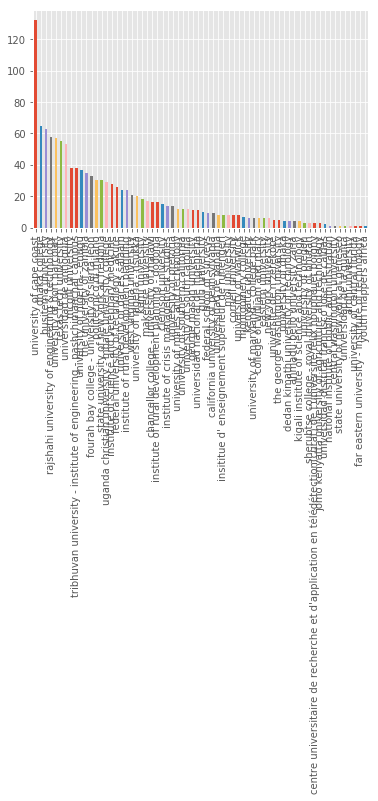

In [17]:
pd.value_counts(users2['University']).plot.bar()